In [199]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import os

In [165]:
data_dir = "C:/Users/Lenovo/Downloads/Disaster Images-20221125T123036Z-001"

In [166]:
#data_dir = pathlib.Path(data_dir)

In [167]:
#files = os.listdir(data_dir)

In [168]:
#len(files)

5

In [181]:
sub_data_dir = []
with os.scandir(data_dir) as entries:
    for entry in entries:
        print(entry.name)
        print(pathlib.Path(data_dir + "/" + entry.name))
        sub_data_dir.append (pathlib.Path(data_dir + "/" + entry.name))

Drought
C:\Users\Lenovo\Downloads\Disaster Images-20221125T123036Z-001\Drought
Earth Quake
C:\Users\Lenovo\Downloads\Disaster Images-20221125T123036Z-001\Earth Quake
Flooding
C:\Users\Lenovo\Downloads\Disaster Images-20221125T123036Z-001\Flooding
Man Made
C:\Users\Lenovo\Downloads\Disaster Images-20221125T123036Z-001\Man Made
Tsunami
C:\Users\Lenovo\Downloads\Disaster Images-20221125T123036Z-001\Tsunami


In [183]:
sub_data_dir[0]

WindowsPath('C:/Users/Lenovo/Downloads/Disaster Images-20221125T123036Z-001/Drought')

In [172]:
#for root, dirs, files in os.walk(data_dir):
#    print(f'{root}: {dirs} {files}')

In [173]:
data_dir

'C:/Users/Lenovo/Downloads/Disaster Images-20221125T123036Z-001'

In [146]:
#image_count_jpg = len(list(data_dir.glob('*.jpg')))

In [147]:
#print(image_count_jpg)

0


In [148]:
#total_image_count = len(list(data_dir.glob('*.*')))

In [149]:
#total_image_count - image_count_jpg

0

In [184]:
Drought = list(sub_data_dir[0].glob('Drought*'))

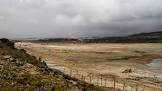

In [185]:
PIL.Image.open(str(Drought[6]))

In [187]:
Earth_Quake = list(sub_data_dir[1].glob('Earth Quake*'))

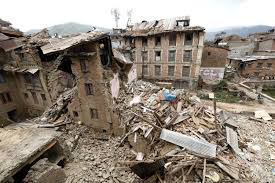

In [188]:
PIL.Image.open(str(Earth_Quake[6]))

In [154]:
data_dir

WindowsPath('C:/Users/Lenovo/Downloads/Disaster Images-20221125T123036Z-001')

In [155]:
batch_size = 32
img_height = 180
img_width = 180

In [159]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 387 files belonging to 5 classes.
Using 310 files for training.


In [160]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 387 files belonging to 5 classes.
Using 77 files for validation.


In [161]:
class_names = train_ds.class_names
print(class_names)

['Drought', 'Earth Quake', 'Flooding', 'Man Made', 'Tsunami']


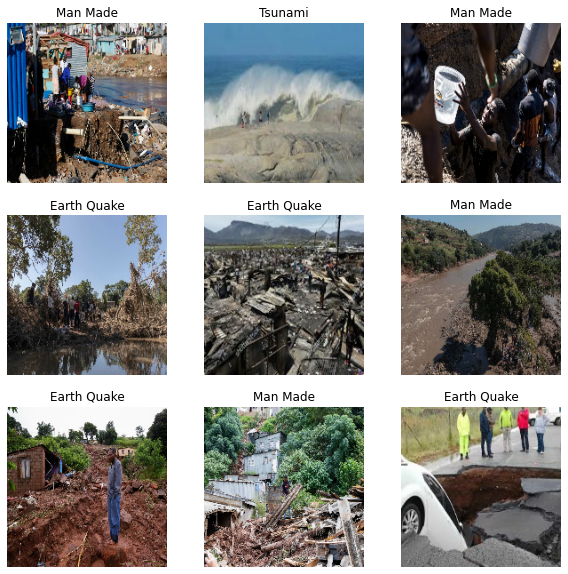

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [189]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [190]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [191]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
10/10 [==============================] - 10s 626ms/step - loss: 1.6316 - accuracy: 0.4484 - val_loss: 1.2890 - val_accuracy: 0.5325
Epoch 2/10
10/10 [==============================] - 5s 470ms/step - loss: 1.2447 - accuracy: 0.5581 - val_loss: 1.2345 - val_accuracy: 0.5325
Epoch 3/10
10/10 [==============================] - 6s 603ms/step - loss: 1.1384 - accuracy: 0.5613 - val_loss: 1.1698 - val_accuracy: 0.5325
Epoch 4/10
10/10 [==============================] - 7s 612ms/step - loss: 0.9730 - accuracy: 0.6032 - val_loss: 1.2262 - val_accuracy: 0.5195
Epoch 5/10
10/10 [==============================] - 7s 598ms/step - loss: 0.8894 - accuracy: 0.6484 - val_loss: 1.3069 - val_accuracy: 0.5195
Epoch 6/10
10/10 [==============================] - 7s 603ms/step - loss: 0.8054 - accuracy: 0.6645 - val_loss: 1.3533 - val_accuracy: 0.5714
Epoch 7/10
10/10 [==============================] - 7s 596ms/step - loss: 0.7762 - accuracy: 0.6968 - val_loss: 1.3547 - val_accuracy: 0.5714
Epoch

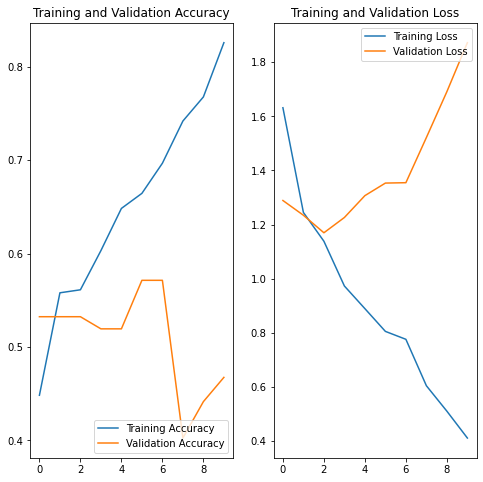

In [192]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [198]:
sunflower_path = "C:/Users/Lenovo/Downloads/Disaster Images-20221125T123036Z-001/Umapped.jpg"

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Tsunami with a 95.78 percent confidence.
